# Assignment 4 - Simple Linear Regression - Delivery Time Prediction Model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')

## Step 1 - Importing Data

In [2]:
dt = pd.read_csv("C:/Users/LENOVO/Desktop/Assignment Data Science/4th/delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Step 2 - Performing EDA on Data = dt

In [3]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.shape

(21, 2)

In [5]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Renaming Columns

In [6]:
dt = dt.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis = 1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Checking Data Type

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Checking for missing values

In [8]:
dt.isna().sum()

delivery_time    0
sorting_time     0
dtype: int64

### Checking for outliers by ploting  boxplot

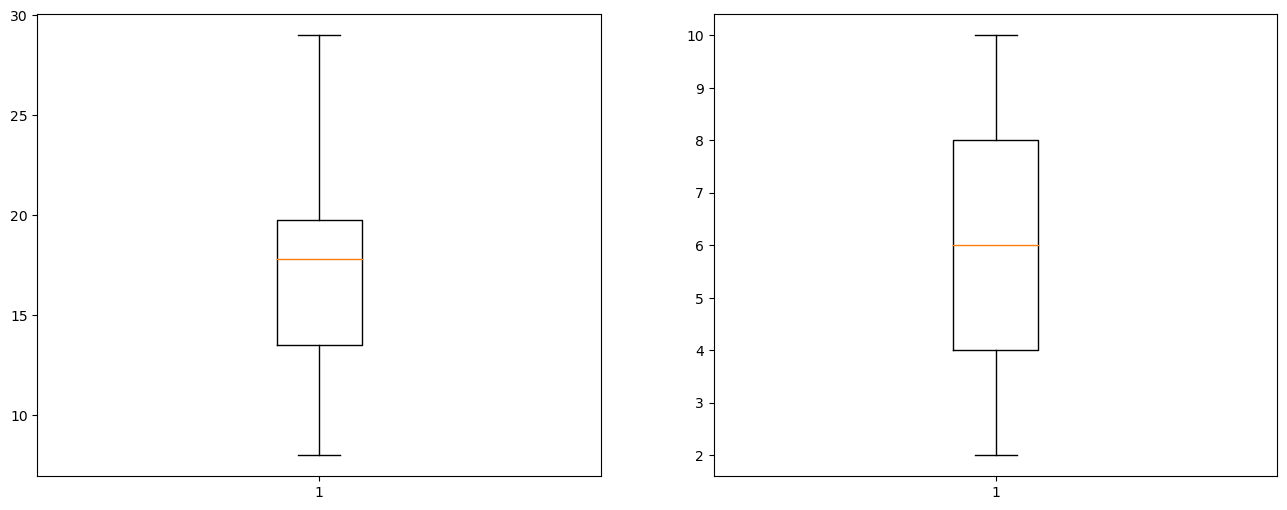

In [9]:
plt.figure(figsize= (16,6))
plt.subplot(1,2,1)
plt.boxplot(dt.delivery_time)
plt.title = ('Box Plot of Delivery time')

plt.subplot(1,2,2)
plt.boxplot(dt.sorting_time)
plt.title = ('Box Plot for Sorting Time')

plt.show()


## Step 3 - Data Visualization

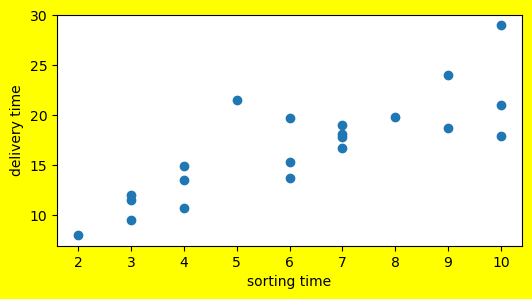

In [10]:
# Scatter plot
plt.figure(figsize=(6,3), facecolor= 'yellow')
plt.scatter(dt['sorting_time'], dt['delivery_time'])
plt.xlabel("sorting time")
plt.ylabel("delivery time")
plt.show()

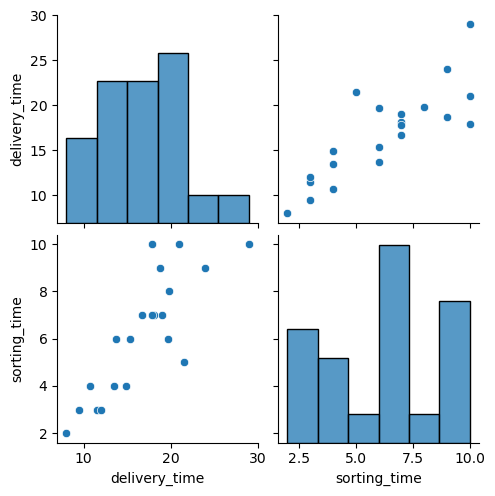

In [11]:
# Pairplot 

sns.pairplot(dt)

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

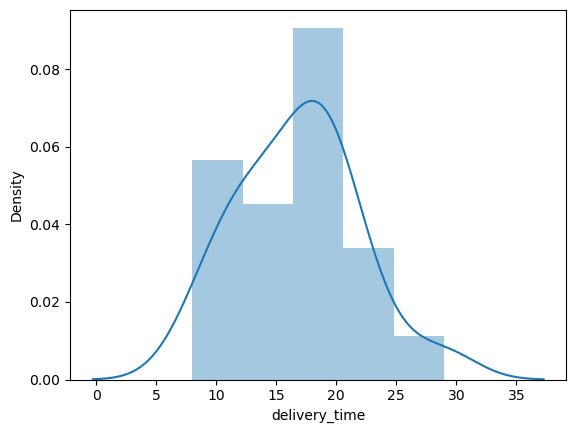

In [12]:
sns.distplot(dt.delivery_time)

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

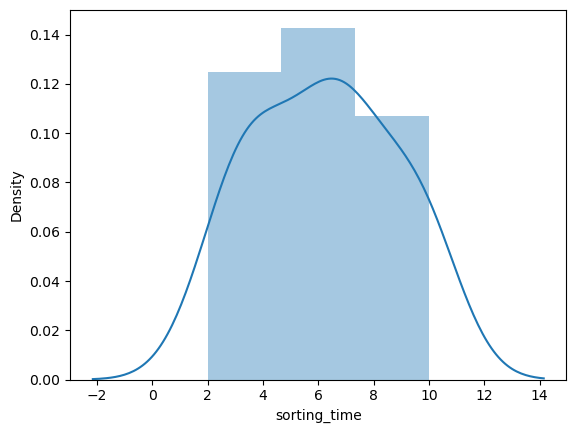

In [13]:
sns.distplot(dt.sorting_time)

### Finding correlation between delivery time and sorting time 

In [14]:
dt.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


# Step 4 - Creating Simple Linear Regression models

## Model_1 : Ordinary Least Square
### Y = B0 + B1*X

In [15]:
# Simple Linear Regression model usinng stats model library (OLS)
import statsmodels.formula.api as smf
model_1 = smf.ols('delivery_time ~ sorting_time', data = dt).fit()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

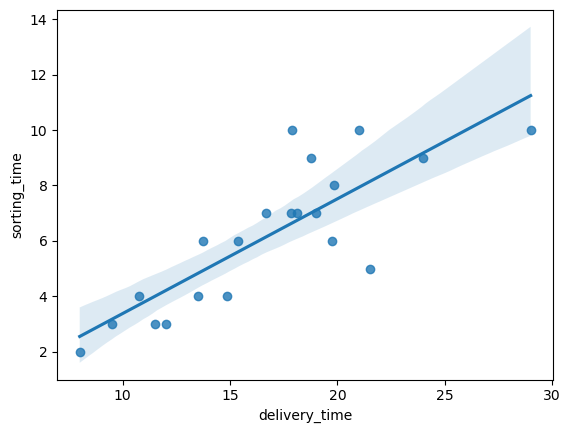

In [16]:
sns.regplot(x = 'delivery_time', y = 'sorting_time', data = dt)

In [17]:
# Coefficients

model_1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        19:38:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Prediction values of target variable

model_1.predict(dt['sorting_time'])

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

### R Squared value for model_1

In [20]:
(model_1.rsquared, model_1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### As you can notice in the above model
### The R-squared and Adjusted R-squared scores are still below 0.85.
### (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
### Lets Try some data transformation to check whether these scores can get any higher than this.

## Model_2 : log of predictor variable (log(x))
### Y = B0 + B1*log(x)

Text(0, 0.5, 'delivery time')

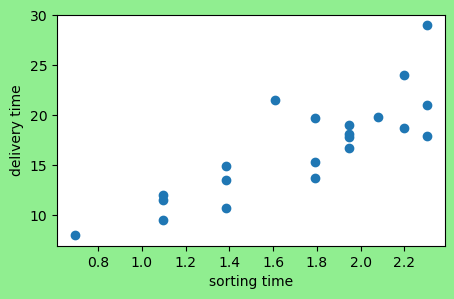

In [21]:
plt.figure(figsize=(5,3), facecolor= 'lightgreen')
plt.scatter(np.log(dt['sorting_time']), dt['delivery_time'])
plt.xlabel('sorting time')
plt.ylabel('delivery time')

In [22]:
model_2 = smf.ols('delivery_time ~ np.log(sorting_time)',data = dt).fit()

In [23]:
model_2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [24]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        19:38:11   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model_2.predict(dt['sorting_time'])

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [26]:
# R Square value for model_2

(model_2.rsquared, model_2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

## As you can notice in the above model:
### The R Square and Adj. R square scores are still below 0.80

## Model_3 : log of predictor variable (log(x)) and log of target variable (log(y))
### log(Y) = B0 + B1*log(x)

Text(0, 0.5, 'sorting time')

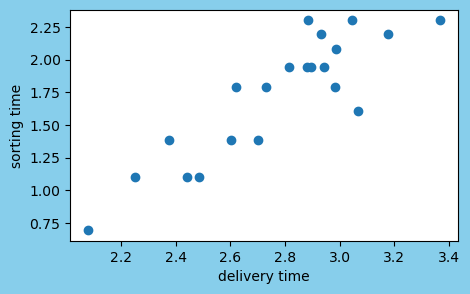

In [27]:
plt.figure(figsize=(5,3), facecolor= 'skyblue')
plt.scatter(np.log(dt.delivery_time), np.log(dt.sorting_time))
plt.xlabel('delivery time')
plt.ylabel('sorting time')

In [28]:
model_3  = smf.ols('np.log(delivery_time) ~ np.log(sorting_time)', data= dt).fit()

In [29]:
model_3.params

Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64

In [30]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                           19:38:12   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
predictions_3 = model_3.predict(dt.sorting_time)
predictions_3

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [32]:
preds = np.exp(predictions_3)
preds

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

### The R Square value is still littel short of 0.80. So, we will try another model. Lets try some other data trasnformation.

## Model_4 : square of predictor variable (x^2) and square of target variable (y^2)
### y^2 = B0 + B1*(x^2)

Text(0, 0.5, 'sorting time')

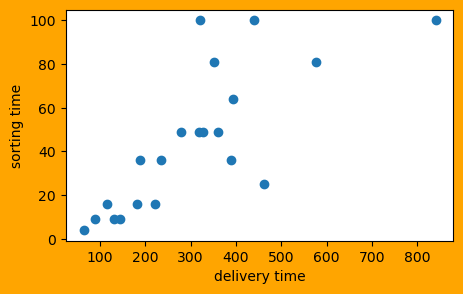

In [33]:
plt.figure(figsize=(5,3), facecolor= 'orange')
plt.scatter(np.square(dt.delivery_time), np.square(dt.sorting_time))
plt.xlabel('delivery time')
plt.ylabel('sorting time')

In [34]:
model_4 = smf.ols('np.square(delivery_time) ~ np.square(sorting_time)', data = dt).fit()

In [35]:
model_4.params

Intercept                  114.154847
np.square(sorting_time)      4.323874
dtype: float64

In [36]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.square(delivery_time)   R-squared:                       0.588
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     27.14
Date:                      Fri, 03 Mar 2023   Prob (F-statistic):           4.99e-05
Time:                              19:38:12   Log-Likelihood:                -129.24
No. Observations:                        21   AIC:                             262.5
Df Residuals:                            19   BIC:                             264.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 114.1548     45.231      2.524      0.021      19.485     208.825
np.square(sorting_time)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R value for above model is very very low. so, will try another model. Lets try some other data transformation.

## Model_5 : Square root transformation of data
### Sqrt(y) = B0 + B1 * Sqrt(x)


In [37]:
model_5 = smf.ols ('np.sqrt(delivery_time) ~ np.sqrt(sorting_time)', data= dt).fit()

In [38]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 03 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                            19:38:12   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R square value is still less than 0.8 and also less than model_3. Lets try some other transformation.

# Model_6 : Cube root transformation of data
### cbrt(y) = B0 + B1 * cbrt(x)

In [39]:
model_6 = smf.ols('np.cbrt(delivery_time) ~ np.cbrt(sorting_time)', data= dt).fit()

In [40]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 03 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                            19:38:12   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R Square score is still below 0.80. Lets try some other data transformation

## Model_7 : Log (y) = B0 + B1 * log(x) + B2 * x^0.5

In [41]:
dt['sqr_sortingtime'] = dt['sorting_time']**0.5
model_7 = smf.ols('np.log(delivery_time) ~ np.log(sorting_time) + sqr_sortingtime', data= dt).fit()

In [42]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.754
Method:                    Least Squares   F-statistic:                     31.58
Date:                   Fri, 03 Mar 2023   Prob (F-statistic):           1.30e-06
Time:                           19:38:12   Log-Likelihood:                 10.575
No. Observations:                     21   AIC:                            -15.15
Df Residuals:                         18   BIC:                            -12.02
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.9424      0.316      6.155      0.000       1.279       2.605
np.log(sorting_time)     1.0755      0.685      1.571      0.134      -0.363       2.514
sqr_sortingtime         -0.4219      0.601     -0.702      0.491      -1.684       0.840
==============================================================================
Omnibus:                        1.557   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.027
Skew:                           0.535   Prob(JB):                        0.599
Kurtosis:                       2.829   Cond. No.                         88.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The R Square score is still less than 0.80. But, better than Model_3. Lets try some other data transformation to achieve 0.80 value 

## Model_8 : Reciprocal transformation of data
### 1/y = B0 + B1 * 1/X

In [71]:
dt['reciprocal_y'] = 1/dt['delivery_time']
dt['reciprocal_x'] = 1/dt['sorting_time']

In [72]:
dt

,delivery_time,sorting_time,sqr_sortingtime,reciprocal_y,reciprocal_x
0,21.00,10,3.162278,0.047619,0.100000
1,13.50,4,2.000000,0.074074,0.250000
2,19.75,6,2.449490,0.050633,0.166667
3,24.00,9,3.000000,0.041667,0.111111
4,29.00,10,3.162278,0.034483,0.100000
5,15.35,6,2.449490,0.065147,0.166667
6,19.00,7,2.645751,0.052632,0.142857
7,9.50,3,1.732051,0.105263,0.333333
8,17.90,10,3.162278,0.055866,0.100000
9,18.75,9,3.000000,0.053333,0.111111


Text(0, 0.5, 'sorting time')

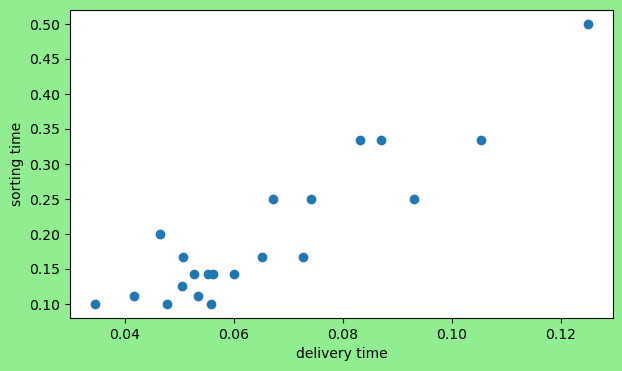

In [62]:
plt.figure(figsize=(7,4), facecolor='lightgreen')
plt.scatter(dt.reciprocal_y, dt.reciprocal_x)
plt.xlabel('delivery time')
plt.ylabel('sorting time')

In [63]:
model_8 = smf.ols('reciprocal_y ~ reciprocal_x', data= dt).fit()

In [64]:
model_8.params

Intercept       0.026629
reciprocal_x    0.196163
dtype: float64

In [65]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           reciprocal_y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     96.47
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           7.02e-09
Time:                        20:03:03   Log-Likelihood:                 69.400
No. Observations:                  21   AIC:                            -134.8
Df Residuals:                      19   BIC:                            -132.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0266      0.004      5.974      0.000       0.017       0.036
reciprocal_x     0.1962      0.020      9.822      0.000       0.154       0.238
==============================================================================
Omnibus:                        0.009   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.996   Jarque-Bera (JB):                0.118
Skew:                           0.002   Prob(JB):                        0.943
Kurtosis:                       2.632   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
predict = model_8.predict(dt.reciprocal_x)

In [67]:
predict_8 = 1 / model_8.predict(dt.reciprocal_x)
predict_8

0     21.623704
1     13.215286
2     16.856852
3     20.650435
4     21.623704
5     16.856852
6     18.297419
7     10.867576
8     21.623704
9     20.650435
10    19.550490
11    13.215286
12    18.297419
13    10.867576
14    10.867576
15    13.215286
16    16.856852
17    18.297419
18     8.018563
19    18.297419
20    15.183305
dtype: float64

In [68]:
(model_8.rsquared, model_8.rsquared_adj)

(0.8354583624350859, 0.8267982762474588)

### After reciprocal transformation of data, this model has scored the highest R-Squared and Adj. R Squared scores among all models.
### Also the R Squared value is greater than 0.80, which is thumb rule for good model for predictions. Hence we can stop here.

## Lets check RMSE of each model too

In [69]:
from sklearn.metrics import mean_squared_error

In [73]:
model1_pred = model_1.predict(dt['sorting_time'])
model2_pred = model_2.predict(dt['sorting_time'])
model3_pred = np.exp(model_3.predict(dt['sorting_time']))
model4_pred = np.sqrt(model_4.predict(dt['sorting_time']))
model5_pred = np.square(model_5.predict(dt['sorting_time']))
model6_pred = pow(model_6.predict(dt['sorting_time']),3)
model8_pred = 1/ (model_8.predict(dt['reciprocal_x']))

In [76]:
model1_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model1_pred))
model2_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model2_pred))
model3_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model3_pred))
model4_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model4_pred))
model5_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model5_pred))
model6_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model6_pred))
model8_rmse = np.sqrt(mean_squared_error(dt['delivery_time'], model8_pred))

In [77]:
summary = {'Model': ['model_1','model_2','model_3', 'model_4','model_5','model_6','model_8'],
          'R-squared value' : [model_1.rsquared, model_2.rsquared, model_3.rsquared, model_4.rsquared, model_5.rsquared, model_6.rsquared, model_8.rsquared],
          'RMSE' : [model1_rmse, model2_rmse, model3_rmse, model4_rmse, model5_rmse, model6_rmse, model8_rmse]}

summary_table = pd.DataFrame(summary)
summary_table

,Model,R-squared value,RMSE
0,model_1,0.682271,2.791650
1,model_2,0.695443,2.733171
2,model_3,0.772161,2.745829
3,model_4,0.588188,2.907239
4,model_5,0.729201,2.762294
5,model_6,0.744117,2.755584
6,model_8,0.835458,2.757528


# So, for predicting of delivery time we will use model_8. 

In [81]:
y = 1/model_8.predict(dt['reciprocal_x'])

0     21.623704
1     13.215286
2     16.856852
3     20.650435
4     21.623704
5     16.856852
6     18.297419
7     10.867576
8     21.623704
9     20.650435
10    19.550490
11    13.215286
12    18.297419
13    10.867576
14    10.867576
15    13.215286
16    16.856852
17    18.297419
18     8.018563
19    18.297419
20    15.183305
dtype: float64

In [82]:
pd.DataFrame({'SORTING TIME': dt.sorting_time,
             'DELIVERY TIME': dt.delivery_time,
             'Predicted Delivery time': y})

,SORTING TIME,DELIVERY TIME,Predicted Delivery time
0,10,21.00,21.623704
1,4,13.50,13.215286
2,6,19.75,16.856852
3,9,24.00,20.650435
4,10,29.00,21.623704
5,6,15.35,16.856852
6,7,19.00,18.297419
7,3,9.50,10.867576
8,10,17.90,21.623704
9,9,18.75,20.650435
